In [7]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

DATA_PATH = 'data/GSE159033/GSE159033_genomic_matrix.csv'
INFO_DATA_PATH = 'data/GSE159033/GSE159033_family_phenotype_data.csv'

All data from PBMC cells, 5 positive samples and 11 negative

## Info

In [8]:
info_df = pd.read_csv(INFO_DATA_PATH, index_col=0)
info_df.head(2)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_name,contact_email,contact_institute,contact_address,contact_city,contact_zip/postal_code,contact_country,supplementary_file,series_id,data_row_count
GSM4817989,Sample04-positive,GSM4817989,Public on Dec 21 2020,Oct 05 2020,Dec 22 2020,RNA,1,Blood,Homo sapiens,9606,...,"Maider,,MuÃ±oz-Culla",maider.munoz@ehu.eus,Biodonostia Institute,Paseo Dr.Begiristain s/n,San Sebastian,20014,Spain,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4817...,"GSE159033,GSE159036",6631
GSM4817990,Sample05-positive,GSM4817990,Public on Dec 21 2020,Oct 05 2020,Dec 22 2020,RNA,1,Blood,Homo sapiens,9606,...,"Maider,,MuÃ±oz-Culla",maider.munoz@ehu.eus,Biodonostia Institute,Paseo Dr.Begiristain s/n,San Sebastian,20014,Spain,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4817...,"GSE159033,GSE159036",6631


In [9]:
info_df['organism_ch1'].unique() # already extrapolated only human data

array(['Homo sapiens'], dtype=object)

## Dataset

In [10]:
df = pd.read_csv(DATA_PATH, index_col=0)

In [11]:
df.head()

,ID,Accession_ID,Accession,Transcript ID(Array Design),Sequence Type,Species Scientific Name,Alignments,Sequence Length,Sequence,Genome Context,...,GSM4817990,GSM4817991,GSM4817992,GSM4817993,GSM4817994,GSM4817995,GSM4817996,GSM4817997,GSM4817998,GSM4817999
0,20500112,MIMAT0000062_st,MIMAT0000062,hsa-let-7a-5p,miRNA,Homo sapiens,chr11:122017276-122017297 (-) /// chr22:465086...,22,UGAGGUAGUAGGUUGUAUAGUU,ENST00000362295 // sense // exon // 1 /// ENST...,...,10.98,12.64,11.17,11.89,11.50,11.56,11.73,11.55,12.16,11.64
1,20500113,MIMAT0004481_st,MIMAT0004481,hsa-let-7a-3p,miRNA,Homo sapiens,chr22:46508680-46508700 (+) /// chr9:96938295-...,21,CUAUACAAUCUACUGUCUUUC,ENST00000362295 // sense // exon // 1 /// ENST...,...,1.34,0.89,1.11,1.14,0.77,0.96,0.79,1.21,1.35,1.38
2,20500114,MIMAT0010195_st,MIMAT0010195,hsa-let-7a-2-3p,miRNA,Homo sapiens,chr11:122017231-122017252 (-),22,CUGUACAGCCUCCUAGCUUUCC,ENST00000362105 // sense // exon // 1,...,1.32,0.86,0.92,0.99,1.18,0.77,0.97,0.51,0.73,0.51
3,20500115,MIMAT0000063_st,MIMAT0000063,hsa-let-7b-5p,miRNA,Homo sapiens,chr22:46509571-46509592 (+),22,UGAGGUAGUAGGUUGUGUGGUU,ENST00000360737 // sense // exon // 5 /// OTTH...,...,13.46,12.67,12.41,12.94,12.43,12.64,12.60,12.00,12.64,12.80
4,20500116,MIMAT0004482_st,MIMAT0004482,hsa-let-7b-3p,miRNA,Homo sapiens,chr22:46509625-46509646 (+),22,CUAUACAACCUACUGCCUUCCC,ENST00000360737 // sense // exon // 5 /// OTTH...,...,1.66,1.44,0.86,1.33,1.44,1.46,0.85,0.89,1.44,2.22


In [13]:
df.shape

(6631, 29)

In [4]:
df.columns

Index(['ID', 'Accession_ID', 'Accession', 'Transcript ID(Array Design)',
       'Sequence Type', 'Species Scientific Name', 'Alignments',
       'Sequence Length', 'Sequence', 'Genome Context',
       'Clustered miRNAs within 10kb', 'Target Genes', 'GeneChip Array',
       'Annotation Date', 'Sequence Source', 'miRNA_ID', 'SPOT_ID', 'ID_REF',
       'GSM4817989', 'GSM4817990', 'GSM4817991', 'GSM4817992', 'GSM4817993',
       'GSM4817994', 'GSM4817995', 'GSM4817996', 'GSM4817997', 'GSM4817998',
       'GSM4817999'],
      dtype='object')

In [5]:
df.describe()

,ID,Sequence Length,ID_REF,GSM4817989,GSM4817990,GSM4817991,GSM4817992,GSM4817993,GSM4817994,GSM4817995,GSM4817996,GSM4817997,GSM4817998,GSM4817999
count,6.631000e+03,6631.000000,6.631000e+03,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000,6631.000000
mean,2.052706e+07,67.374001,2.052706e+07,1.887732,1.838709,1.886148,1.894238,1.896741,1.896274,1.907945,1.896352,1.869264,1.886445,1.905634
std,1.178865e+04,45.554202,1.178865e+04,2.078287,2.047057,2.076719,2.088953,2.094335,2.094137,2.084346,2.089934,2.018481,2.073971,2.106783
min,2.050011e+07,16.000000,2.050011e+07,0.290000,0.400000,0.300000,0.400000,0.240000,0.330000,0.430000,0.230000,0.350000,0.400000,0.300000
25%,2.051948e+07,22.000000,2.051948e+07,0.990000,0.990000,0.980000,0.970000,1.000000,0.980000,1.010000,0.980000,1.000000,0.970000,0.980000
50%,2.053330e+07,71.000000,2.053330e+07,1.170000,1.200000,1.170000,1.200000,1.200000,1.170000,1.220000,1.190000,1.210000,1.180000,1.170000
75%,2.053580e+07,97.000000,2.053580e+07,1.530000,1.540000,1.520000,1.550000,1.550000,1.540000,1.590000,1.560000,1.570000,1.540000,1.530000
max,2.053849e+07,548.000000,2.053849e+07,15.970000,15.970000,15.960000,15.940000,15.960000,15.960000,15.970000,15.960000,15.930000,15.960000,15.970000


### Accession_ID

**Accession_ID**: refers to a specific microRNA (miRNA) entry in the miRBase database. miRBase is a comprehensive database that provides information on miRNA sequences, nomenclature, and targets.

**Accession_ID** that start with 'gi' follow a notation style that might be used in a specific biological database or context, such as NCBI's GenInfo Identifier (GI) system

Prefix:

1. **MIMAT**: 
   - Refers to mature microRNA sequences in the miRBase database.

2. **ENSG**:
   - Refers to Ensembl Gene identifiers.

3. **ACA, HBI-, HBII-, MI0, U, Z, hTR, mgU, mgh, snR, E2, E3, SNORA, SNORD**:
   - These prefixes generally refer to various small non-coding RNAs (snoRNAs, snRNAs, etc.).
   - **ACA**: Often associated with H/ACA box snoRNAs.
   - **HBI-, HBII-**: Typically refer to C/D box snoRNAs.
   - **MI0**: Could be referring to a specific type of small RNA or microRNA-related.
   - **U**: Often denotes U series snRNAs (small nuclear RNAs).
   - **Z**: Could be a specific nomenclature within a particular database or project.
   - **hTR**: Human telomerase RNA component.
   - **mgU, mgh**: These could be specific prefixes used within a particular dataset or experiment.
   - **snR**: Small nuclear RNAs.
   - **E2, E3**: These could denote specific RNA elements or experimental conditions.
   - **SNORA, SNORD**: Refer to small nucleolar RNAs of the H/ACA and C/D box families respectively.

4. **14qII, 14qI-, 14q0**:
   - Likely refer to specific genomic regions on chromosome 14.
   - **14qII**: Region on the long arm (q) of chromosome 14.
   - **14qI-**: Possibly another specific region on 14q.
   - **14q0**: Another specific location on 14q.

5. **spike_in-control**:
   - Refers to control sequences used for normalization in experiments, such as RNA-seq or qPCR.

6. **gi**:
   - Refers to GenInfo Identifier (GI), a legacy identifier from NCBI for sequences.

- **Relevant Databases**: Look up the identifiers in their respective databases (e.g., miRBase for MIMAT, Ensembl for ENSG, NCBI for GI).
- **Annotation**: Annotate each feature using the appropriate database.
   - **MIMAT**: Use miRBase.
   - **ENSG**: Use Ensembl.
   - **gi**: Use NCBI.

In [17]:
df['Accession_ID']

0         MIMAT0000062_st
1         MIMAT0004481_st
2         MIMAT0010195_st
3         MIMAT0000063_st
4         MIMAT0004482_st
              ...        
6626    gi555853_copy5_st
6627    gi555853_copy6_st
6628    gi555853_copy7_st
6629    gi555853_copy8_st
6630    gi555853_copy9_st
Name: Accession_ID, Length: 6631, dtype: object

In [27]:
df['Accession_ID'].to_csv('data/GSE159033/GSE159033_accession_ids.csv')

In [53]:
a = (sum(df['Accession_ID'].str.startswith('MIMAT')),
    sum(df['Accession_ID'].str.startswith('ENSG')),
    sum(df['Accession_ID'].str.startswith('ACA')),
    sum(df['Accession_ID'].str.startswith('14qII')), sum(df['Accession_ID'].str.startswith('14qI-')),
    sum(df['Accession_ID'].str.startswith('14q0')),
    sum(df['Accession_ID'].str.startswith('HBI-')), sum(df['Accession_ID'].str.startswith('HBII-')),
    sum(df['Accession_ID'].str.startswith('MI0')),
    sum(df['Accession_ID'].str.startswith('U')),
    sum(df['Accession_ID'].str.startswith('Z')),
    sum(df['Accession_ID'].str.startswith('hTR')),
    sum(df['Accession_ID'].str.startswith('mgU')), sum(df['Accession_ID'].str.startswith('mgh')),
    sum(df['Accession_ID'].str.startswith('snR')),
    sum(df['Accession_ID'].str.startswith('E2')), sum(df['Accession_ID'].str.startswith('E3')),
    sum(df['Accession_ID'].str.startswith('SNORA')), sum(df['Accession_ID'].str.startswith('SNORD')),
    sum(df['Accession_ID'].str.startswith('spike_in-control')), 
    sum(df['Accession_ID'].str.startswith('gi'))
    )
# MIMAT, ENSG, ACA, 14qII, 14qI-, 14q0, HBI-, HBII-, MI0, U, Z, hTR, mgU, mgh, snR, E2, E3, SNORA, SNORD, spike_in-control, gi

In [54]:
a, sum(a)

((2578,
  1491,
  106,
  41,
  12,
  1,
  8,
  121,
  2025,
  171,
  1,
  1,
  14,
  3,
  4,
  1,
  1,
  11,
  9,
  22,
  10),
 6631)

### Transcript ID

In [59]:
len(df['Transcript ID(Array Design)'].unique())

6050

In [67]:
df['Transcript ID(Array Design)'].value_counts()[df['Transcript ID(Array Design)'].value_counts() > 1]

Transcript ID(Array Design)
gi:555853          10
ENSG00000251974     3
SNORA84             3
SNORA38B            3
ENSG00000206903     3
                   ..
hsa-mir-101-1       2
hsa-mir-29b-1       2
hsa-mir-29b-2       2
14qI-4              2
ENSG00000221164     2
Name: count, Length: 529, dtype: int64

In [70]:
df['Transcript ID(Array Design)'].value_counts()[df['Transcript ID(Array Design)'].value_counts() > 2]

Transcript ID(Array Design)
gi:555853          10
ENSG00000251974     3
SNORA84             3
SNORA38B            3
ENSG00000206903     3
ENSG00000199894     3
ENSG00000199959     3
hsa-mir-4776-2      3
hsa-mir-4776-1      3
hsa-mir-4773-2      3
hsa-mir-4773-1      3
hsa-mir-3116-1      3
hsa-mir-3116-2      3
HBII-85-26          3
hsa-mir-4679-1      3
hsa-mir-3130-1      3
hsa-mir-3130-2      3
ENSG00000252798     3
ENSG00000201009     3
ENSG00000201042     3
ENSG00000252840     3
hsa-mir-3158-1      3
hsa-mir-3158-2      3
hsa-mir-3910-2      3
hsa-mir-3160-1      3
hsa-mir-3160-2      3
hsa-mir-3910-1      3
hsa-mir-3199-1      3
HBI-61              3
hsa-mir-3199-2      3
hsa-mir-3202-2      3
ENSG00000199231     3
hsa-mir-3202-1      3
hsa-mir-124-1       3
mgU12-22-U4-8       3
ACA34               3
ACA36B              3
ENSG00000212378     3
hsa-mir-133a-1      3
hsa-mir-133a-2      3
U49A                3
U46                 3
ACA2b               3
mgU2-25-61          3
ACA4

### Sequence Type

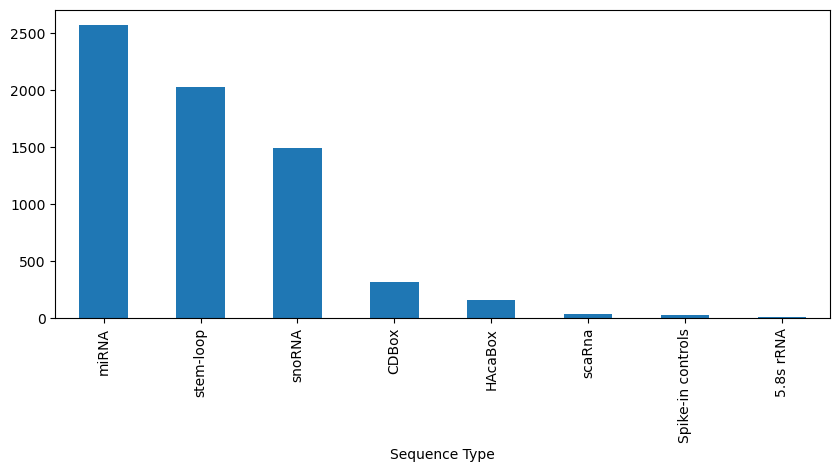

In [64]:
df['Sequence Type'].value_counts().plot(kind='bar', figsize=(10, 4));

### Alignments

**Alignments**: these alignments provide specific locations and orientations for segments on chromosomes 11, 22, and 9. The negative strand on chromosome 11 means the sequence is read in the reverse direction, while the positive strands on chromosomes 22 and 9 are read in the forward direction.

In [16]:
df['Alignments'][0]

'chr11:122017276-122017297 (-) /// chr22:46508632-46508653 (+) /// chr9:96938244-96938265 (+)'

In [14]:
len(df[df['Alignments'] != '---'])

6596

### Genome Context

**Genome Context**: This annotation lists several transcripts, their orientations (sense strand), the type of feature (exon or intron), and the specific number of that feature within the transcript. Ensembl (ENST) and HAVANA (OTTHUMT) are both sources for transcript information, with Ensembl being a widely used genomic database and HAVANA providing high-quality manual annotation.

In [15]:
len(df[df['Genome Context'] != '---'])

3615

In [9]:
df['Genome Context'][0]

'ENST00000362295 // sense // exon // 1 /// ENST00000602703 // sense // intron // 1 /// OTTHUMT00000467752 // sense // intron // 1 /// ENST00000362105 // sense // exon // 1 /// ENST00000360737 // sense // exon // 5 /// OTTHUMT00000316781 // sense // exon // 5'